In [ ]:
url1="startup_funding.csv"
url2="https://raw.githubusercontent.com/Satyampd/Startups-in-India-EDA/master/dataset.csv"
url3="startup_funding2018.csv"
url4="indian_startup_2022.csv"
url5="https://raw.github.com/bhagirathbhard/IndianStartupFunding"

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv(url1)
df1.rename(columns={'StartupName': 'Startup', 'CityLocation': 'City', 'IndustryVertical': 'Sector', 'SubVertical': 'SubSector',
                    'InvestorsName': 'Investor', 'InvestmentType': 'InvestmentType', 'AmountInUSD': 'AmountInUSD',
                    'Date': 'Date'}, inplace=True)
df2=pd.read_csv(url2)
df3=pd.read_csv(url3)
df4=pd.read_csv(url4,encoding='cp1252')
df5=pd.read_csv(url5)

In [10]:
df1.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubSector,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [18]:
df2.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [19]:
df3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [20]:
df4.head()

,Company Name,Founded,Location,Sector,What it does,Founders,Investor,Amount,Stage
0,Dyte,2020,Bengaluru,IT Services and IT Consulting,Dyte provides the easiest way to add real-time...,"Felix Lee,Vivan",Multiples,"$15,300,000",undisclosed
1,Kirana Bazaar,2018,Gurgaon,Oline grocery,Kirana Bazaar is a neighborhood store network ...,"Abhishek Halder, Anilesh Yadav",Multiples,"$32,800,000",undisclosed
2,Phool,2017,kanpur,Enviromental Engineering,Phool is a biomaterial startup.,Ankit Agrawal,Multiples,"$9,400,000",undisclosed
3,Doceree,2019,Parsippany,Information Technology & Services,Doceree is a fully integrated programmatic ad ...,"Daleep Manhas, Harshit Jain, Stephen Hoelper",Multiples,"12,000,000",undisclosed
4,Acko,2016,Mumbai,Health insurance,Acko is a digital insurance company with a lic...,NaN,Multiples,"$458,000,000",Series D


In [41]:
def clean_amount(value):
    if pd.isna(value):
        return np.nan
    value = str(value).replace(',', '').replace('₹', '').replace('$', '').strip()
    if value in ['Undisclosed', 'N/A', '-', '—']:
        return np.nan
    try:
        return float(value)
    except:
        return np.nan

# Unified standardization function
def standardize_dataset(df, source):
    df.columns = df.columns.str.strip()
    column_map = {
        'Startup Name': 'startup', 'Company Name': 'startup',
        'Industry Vertical': 'sector', 'Industry': 'sector', 'Sector': 'sector',
        'SubSector': 'subsector', 'SubVertical': 'subsector',
        'City Location': 'city', 'Location': 'city',
        'Investors Name': 'investor', 'Investor': 'investor',
        'InvestmentnType': 'investmenttype', 'Round/Series': 'investmenttype', 'Stage': 'investmenttype',
        'Amount in USD': 'amountinusd', 'Amount': 'amountinusd',
        'Date dd/mm/yyyy': 'date', 'Founded': 'founded'
    }

    df = df.rename(columns={k: v for k, v in column_map.items() if k in df.columns})

    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
    else:
        df['date'] = np.nan

    df['amountinusd'] = df['amountinusd'].apply(clean_amount)
    df['subsector'] = df.get('subsector', np.nan)
    df['investor'] = df.get('investor', np.nan)
    df['source'] = source

    return df[['startup', 'sector', 'subsector', 'city', 'investor', 'investmenttype', 'amountinusd', 'date', 'source']]

# Assuming df1 to df4 are already loaded
df1_clean = standardize_dataset(df1, 'df1')
df2_clean = standardize_dataset(df2, 'df2')
df3_clean = standardize_dataset(df3, 'df3')
df4_clean = standardize_dataset(df4, 'df4')

merged_df = pd.concat([df1_clean, df2_clean, df3_clean, df4_clean], ignore_index=True)

# Basic cleansing
merged_df['startup'] = merged_df['startup'].fillna('Unknown').str.title().str.strip()
merged_df['sector'] = merged_df['sector'].fillna('Unknown').str.title().str.strip()
merged_df['city'] = merged_df['city'].fillna('Unknown').str.title().str.strip()
merged_df['investmenttype'] = merged_df['investmenttype'].fillna('Unknown').str.title().str.strip()

# Fill missing dates with the mode year if date is missing (assume it's around 2018)
merged_df['year'] = merged_df['date'].dt.year.fillna(2018).astype(int)
merged_df['quarter'] = merged_df['date'].dt.quarter.fillna(1).astype(int)
merged_df['month'] = merged_df['date'].dt.month.fillna(1).astype(int)

# Remove rows with all critical fields missing
merged_df = merged_df.dropna(subset=['sector', 'investmenttype', 'amountinusd'], how='all')

# Save the enriched data
merged_df.to_csv('merged_maximum_data.csv', index=False)
print(f"Final enriched dataset shape: {merged_df.shape}")
print(merged_df.head())


Final enriched dataset shape: (6709, 12)
   startup   sector                              subsector     city investor  \
0  Unknown  Unknown                             E-learning  Unknown      NaN   
1  Unknown  Unknown              App based shuttle service  Unknown      NaN   
2  Unknown  Unknown  Retailer of baby and toddler products  Unknown      NaN   
3  Unknown  Unknown                      Online Investment  Unknown      NaN   
4  Unknown  Unknown            Embroiled Clothes For Women  Unknown      NaN   

  investmenttype  amountinusd date source  year  quarter  month  
0        Unknown          NaN  NaT    df1  2018        1      1  
1        Unknown          NaN  NaT    df1  2018        1      1  
2        Unknown          NaN  NaT    df1  2018        1      1  
3        Unknown          NaN  NaT    df1  2018        1      1  
4        Unknown          NaN  NaT    df1  2018        1      1  


In [51]:
df = pd.read_csv('synthetic_indian_startups.csv')

# Ensure datetime and year columns
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df.head()

,startup,sector,subsector,city,investor,investmenttype,amountinusd,date,year,quarter
0,Hamilton PLC,FinTech,FinTech Services,Bengaluru,Investor_1,Series A,4942557.50,2018-02-22,2018,1
1,Davila-Smith,FinTech,FinTech Services,Mumbai,Investor_41,Series C,333117.40,2012-11-08,2012,4
2,Barnes-Bell,AgriTech,AgriTech Services,Pune,"Investor_41, Investor_49",Series A,497488.39,2006-04-23,2006,2
3,Turner-Collier,Logistics,Logistics Services,Kolkata,"Investor_41, Investor_7, Investor_93",Series D+,8987777.19,2006-05-01,2006,2
4,Villanueva-Boyd,SaaS,SaaS Services,Ahmedabad,"Investor_90, Investor_21",Seed,1706627.10,2012-09-22,2012,3


Q1.How do different cities specialize across various funding stages (Pre-Seed, Seed, Series A, Series B, Series C, Series D+), and how have these specializations evolved over the past 15 years?

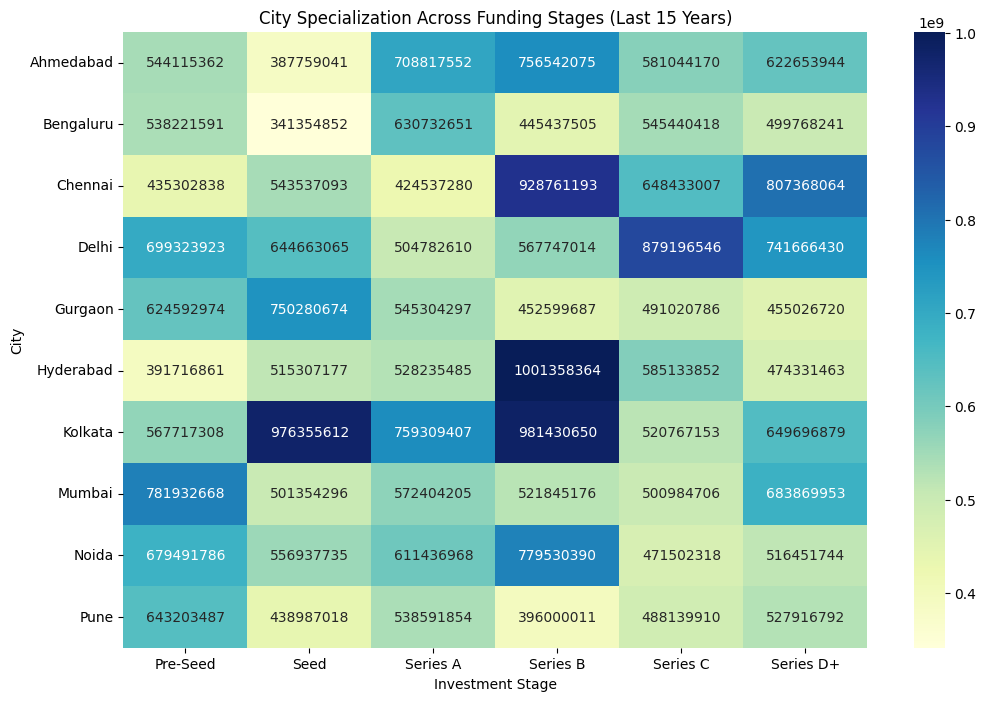

In [65]:
city_stage = df[df['year'] >= df['year'].max() - 15]
city_stage_pivot = city_stage.pivot_table(index='city', columns='investmenttype', values='amountinusd', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(city_stage_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('City Specialization Across Funding Stages (Last 15 Years)')
plt.ylabel('City')
plt.xlabel('Investment Stage')
plt.show()

Q2.Which startup sectors have attracted the highest number of unique investors, and how has the diversity of investors per sector changed annually over the last 10 years?

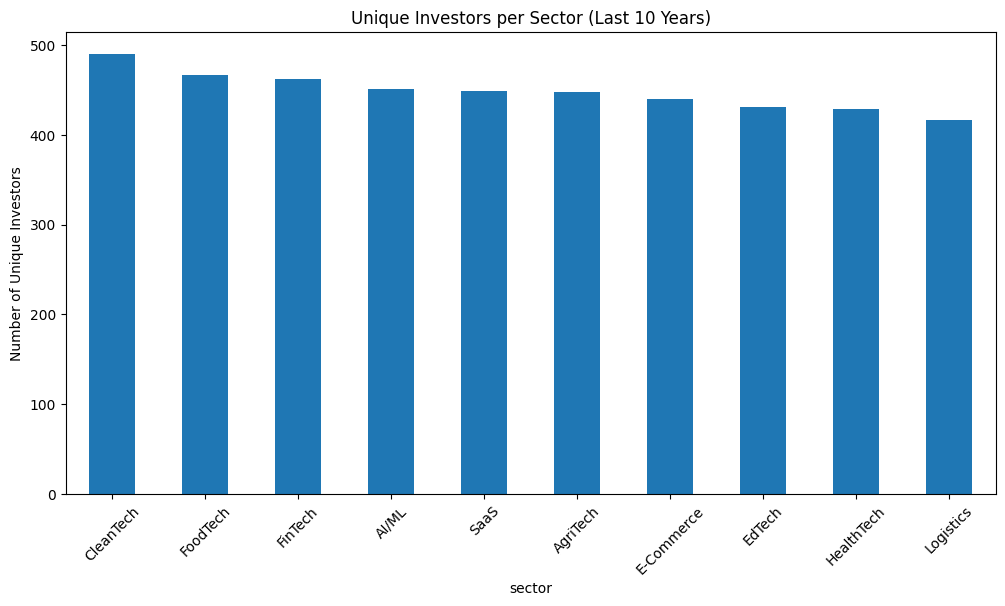

In [62]:
investors_sector = df[df['year'] >= df['year'].max() - 10].groupby('sector')['investor'].nunique().sort_values(ascending=False)
investors_sector.plot(kind='bar', figsize=(12,6), title='Unique Investors per Sector (Last 10 Years)')
plt.ylabel('Number of Unique Investors')
plt.xticks(rotation=45)
plt.show()

Q3.Which sectors demonstrate the highest volatility in funding amounts when measured by standard deviation or coefficient of variation over quarterly intervals in the past 20 years?

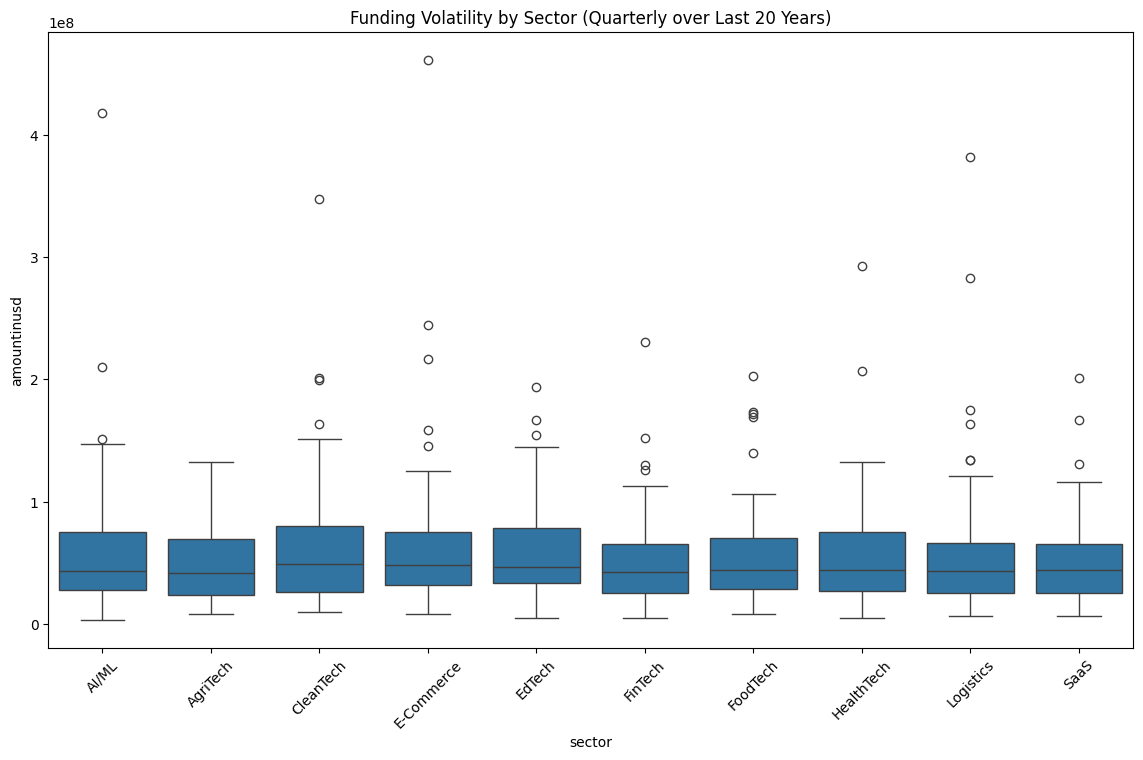

In [67]:
volatility_df = df[df['year'] >= df['year'].max() - 20].groupby(['sector', 'quarter'])['amountinusd'].sum().reset_index()
plt.figure(figsize=(14,8))
sns.boxplot(data=volatility_df, x='sector', y='amountinusd')
plt.title('Funding Volatility by Sector (Quarterly over Last 20 Years)')
plt.xticks(rotation=45)
plt.show()

Q4.What are the significant seasonal patterns in startup funding activity across months and quarters, and how consistently do these patterns repeat across the past 15 years?

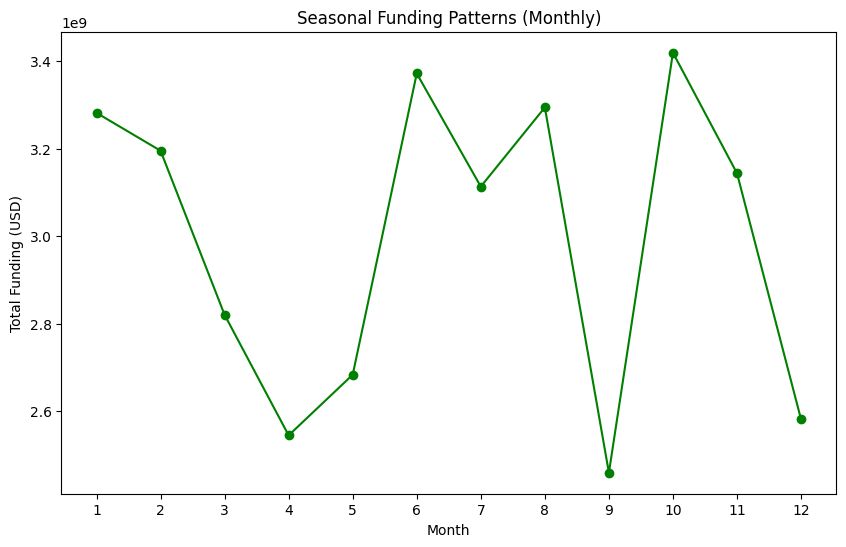

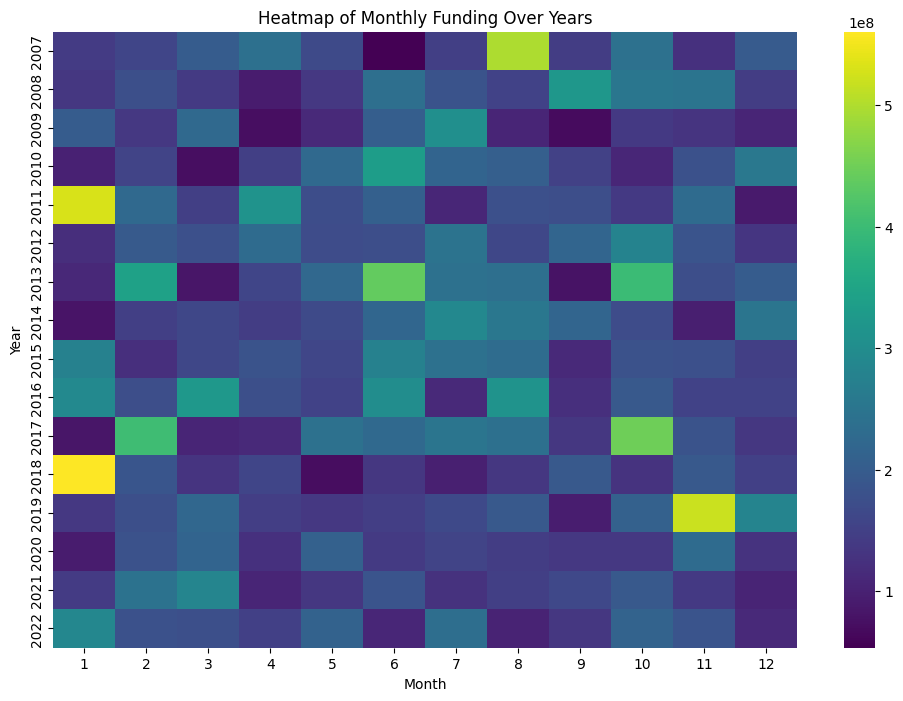

In [70]:
seasonal_df = df[df['year'] >= df['year'].max() - 15].copy()
seasonal_df['month'] = seasonal_df['date'].dt.month

monthly_trend = seasonal_df.groupby('month')['amountinusd'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_trend['month'], monthly_trend['amountinusd'], marker='o', color='green')
plt.title('Seasonal Funding Patterns (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Funding (USD)')
plt.xticks(range(1,13))
plt.show()


heatmap_data = seasonal_df.groupby(['year', 'month'])['amountinusd'].sum().unstack(fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False)
plt.title('Heatmap of Monthly Funding Over Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

Q5.How have the dominant sectors funded within each major city changed over the past 20 years, and which sectors have emerged or declined significantly in specific geographies?

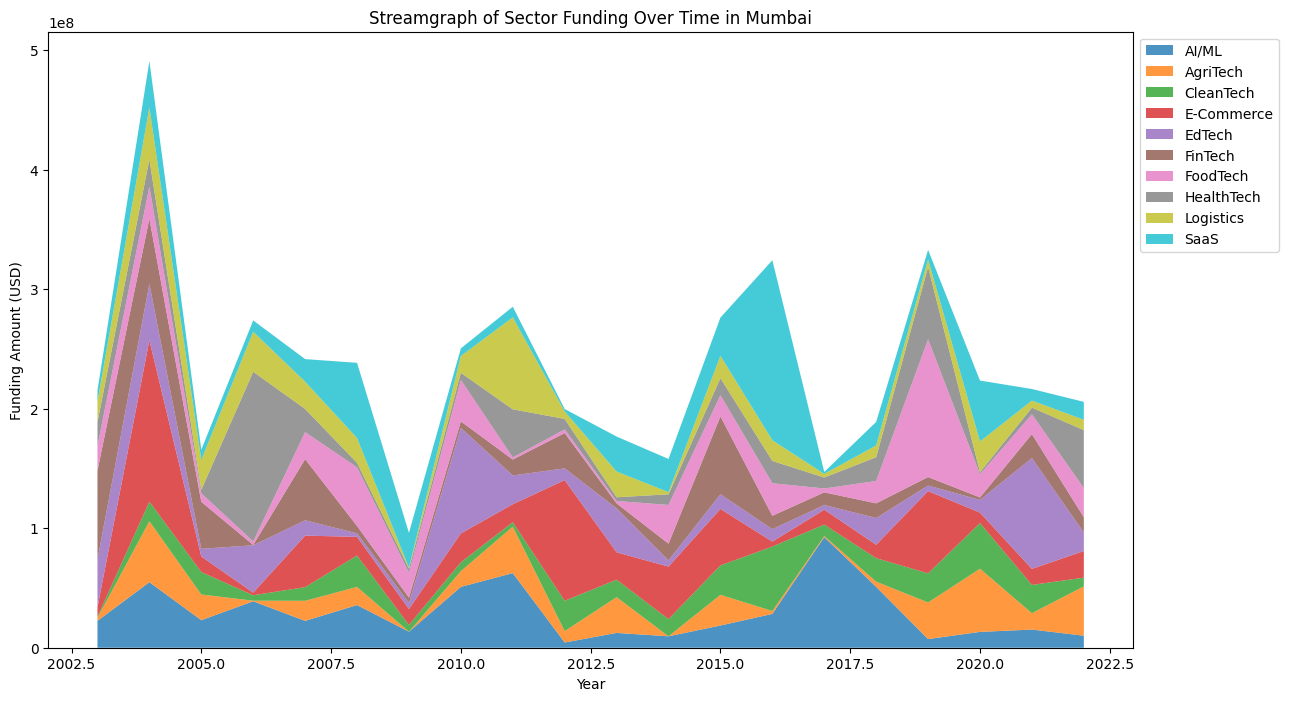

In [ ]:

df_20yrs = df[df['year'] >= df['year'].max() - 20]

city = 'Mumbai'
city_data = df_20yrs[df_20yrs['city'] == city]

pivot_data = city_data.pivot_table(index='year', columns='sector', values='amountinusd', aggfunc='sum', fill_value=0)

# Plot streamgraph
plt.figure(figsize=(14, 8))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns, alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(f'Streamgraph of Sector Funding Over Time in {city}')
plt.xlabel('Year')
plt.ylabel('Funding Amount (USD)')
plt.show()
